 ### ANALYSIS OF THE PLAYERS DATASET 

# Data analysis from players,players valuations and clubs datasets 
The first cell is just to set folder path and library used

In [31]:
import pandas as pd
import seaborn as sns 
import geopandas as gpd
import matplotlib.pyplot as plt
# import plotly.express as px

folder_path = '../assets/Assignment_Data_2023-2024/Assignment_Data_2023-2024/'
players_df = pd.read_csv(folder_path+'players.csv')
club_df = pd.read_csv(folder_path+'clubs.csv')
players_valuations_df = pd.read_csv(folder_path+'player_valuations.csv')
players_valuations_df_nona = players_valuations_df.dropna()
players_df_nona = players_df.dropna()

# Value of the players correlated to their position 
Distribution of market value of players depending on their position
We can see 1 point in the Attack column that we can consider an outlier because it is out of the usual bounds 

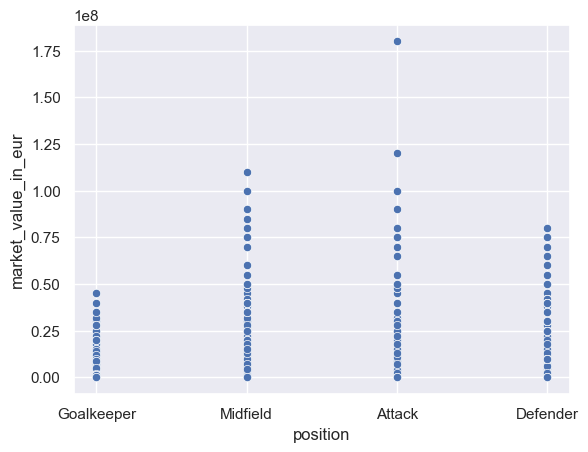

In [32]:
sns.scatterplot(x='position', y='market_value_in_eur', data=players_df_nona)
plt.show(); 

# Analysis of the outlier in the Attack column
Finding who is the player that has the highest market value in the Attack position
that create the outlier in the graph above,just by searcing the highest value in the column

In [33]:
players_df_nona[players_df_nona['market_value_in_eur'] == players_df_nona['market_value_in_eur'].max()]


,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
12249,418560,Erling,Haaland,Erling Haaland,2023,281,erling-haaland,England,Leeds,Norway,...,left,195.0,180000000.0,180000000.0,2027-06-30 00:00:00,Rafaela Pimenta,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/erling-haaland...,GB1,Manchester City


As we can see Erling Haaland is the player with the highest market value in the attack position, and also in all the players provided by the dataset
his value is way higher than the other players provided by the dataset

## Analysis of the amount of players in each position
We can use a pychart to see the amount of players in each position

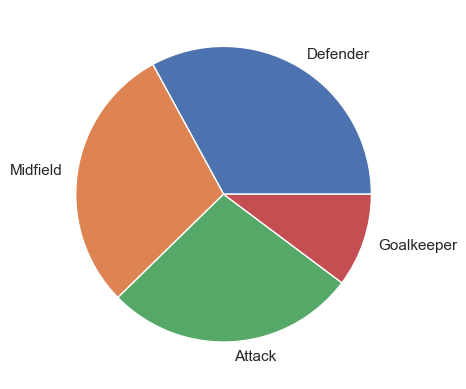

In [34]:
plt.pie(players_df_nona['position'].value_counts(), labels=players_df_nona['position'].value_counts().index,autopct='')
plt.show()

# Grouping by team lineups 

In [35]:
players_df['full_name'] = players_df['first_name'] + ' ' + players_df['last_name']
players_df[['full_name','current_club_name']]
# group by team lineups
team_lineups = players_df.groupby('current_club_name')['full_name'].apply(list)
team_lineups


current_club_name
1.FC Heidenheim 1846    [Nikola Dovedan, Florian Pick, Tim Siersleben,...
1.FC Köln               [Sven Bacher, Kristian Pedersen, Jan Thielmann...
1.FC Nuremberg          [Enrico Valentini, Patrick Rakovsky, Hanno Bal...
1.FC Union Berlin       [Alexander Schwolow, Paul Seguin, Sheraldo Bec...
1.FSV Mainz 05          [Stephan Fürstner, Fabian Frei, Philipp Schulz...
                                              ...                        
Yeni Malatyaspor        [Bugra Cagiran, Yakup Alkan, Yigithan Güveli, ...
Zenit St. Petersburg    [Anatoliy Tymoshchuk, Aleksandr Kerzhakov, Art...
Zirka Kropyvnytskyi     [Maksym Drachenko, Sergiy Kernozhytskyi, Oleks...
Zorya Lugansk           [Andriy Poltavtsev, Dmytro Myshnyov, Vladyslav...
Ümraniyespor            [Olarenwaju Kayode, Isaac Sackey, Yusuf Yardim...
Name: full_name, Length: 424, dtype: object

# Top 10 players with the highest market value in the world

<Axes: xlabel='highest_market_value_in_eur', ylabel='full_name'>

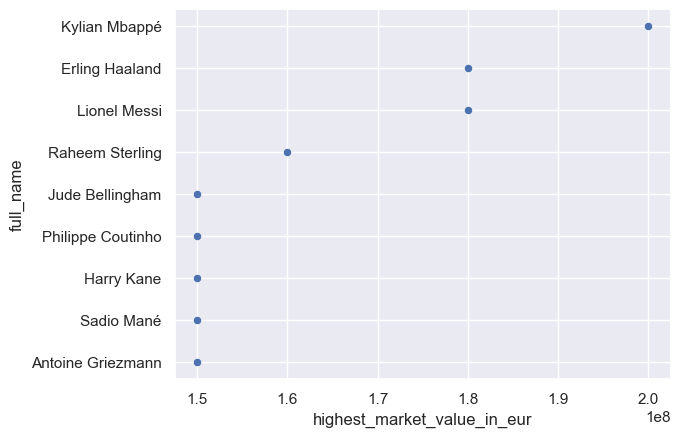

In [36]:

players_df['full_name'] = players_df['first_name'] + ' ' + players_df['last_name']
player_df_sorted = players_df.sort_values(by='highest_market_value_in_eur', ascending=False).head(10)
top_10_players = player_df_sorted.head(10)
player_df_sorted = player_df_sorted.iloc[::-1]
'''
fig = px.scatter(player_df_sorted, x="highest_market_value_in_eur", y="full_name",orientation='v')
fig.show()
'''

sns.set_theme(style="darkgrid")
sns.scatterplot(x='highest_market_value_in_eur', y='full_name', data=top_10_players)

# We are showing on that map the country of origin of the player (in dataset)
using geopandas lib to show 

In [40]:

# Get counts of players per country
player_counts = players_df["country_of_birth"].value_counts()

# Create a new DataFrame with country names and player counts
player_counts_df = pd.DataFrame({
    'name': player_counts.index,
    'player_count': player_counts.values
})

# Merge world DataFrame with player counts
world = world.merge(player_counts_df, how="left", on="name")

# Replace NaN values with 0 (countries with no players)
world['player_count'].fillna(0, inplace=True)

# Plot the world map with player counts
fig, ax = plt.subplots(1, 1)
world.plot(column='player_count', 
           cmap='YlOrRd', 
           linewidth=0.8, 
           ax=ax, 
           edgecolor='0.8', 
           legend=True, 
           legend_kwds={'label': "Player Count", 'orientation': "horizontal"})
plt.show()

NameError: name 'world' is not defined

# Data analysis how the must valued player take value in the market during the time

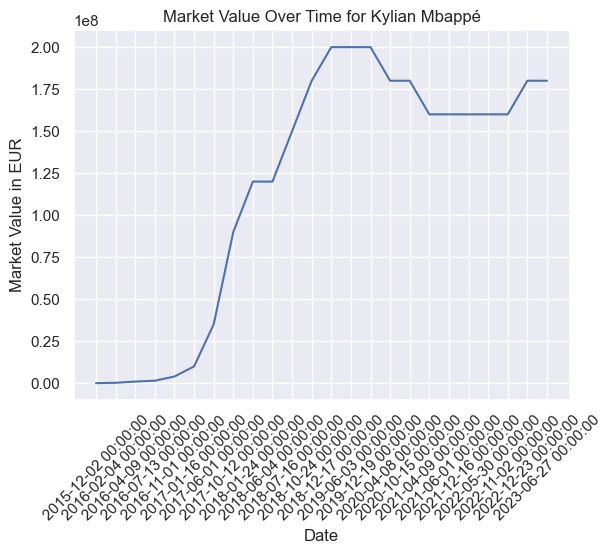

In [41]:

merged_df = players_valuations_df.merge(players_df[['player_id', 'first_name', 'last_name']], on='player_id')

max_market_player = merged_df.loc[merged_df['market_value_in_eur'].idxmax()]

player_valuation_df = merged_df[merged_df['player_id'] == max_market_player['player_id']]

plt.plot(player_valuation_df['datetime'], player_valuation_df['market_value_in_eur'])
plt.title('Market Value Over Time for {} {}'.format(max_market_player['first_name'], max_market_player['last_name']))
plt.xlabel('Date')
plt.ylabel('Market Value in EUR')
plt.xticks(rotation=45)
plt.show()

# Data analysis how the less valued player take value in the market during the time

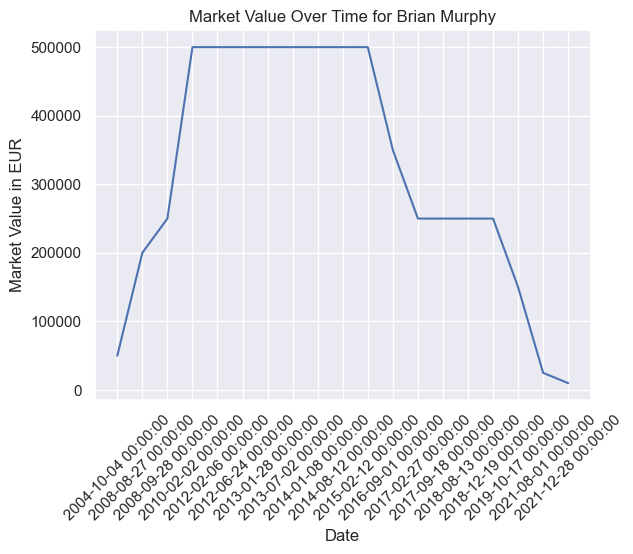

In [38]:

merged_df = players_valuations_df.merge(players_df[['player_id', 'first_name', 'last_name']], on='player_id')

max_market_player = merged_df.loc[merged_df['market_value_in_eur'].idxmin()]

player_valuation_df = merged_df[merged_df['player_id'] == max_market_player['player_id']]

plt.plot(player_valuation_df['datetime'], player_valuation_df['market_value_in_eur'])
plt.title('Market Value Over Time for {} {}'.format(max_market_player['first_name'], max_market_player['last_name']))
plt.xlabel('Date')
plt.ylabel('Market Value in EUR')
plt.xticks(rotation=45)
plt.show()